In [179]:
import pandas as pd

# Understanding the Data

Understanding Rounds2 Data

In [180]:
#Reading rounds
rounds2=pd.read_csv("C:\\Users\\dell\\Downloads\\rounds2.csv",encoding = "ISO-8859-1")

In [181]:
#knowing rounds2 shape
rounds2.shape

(114949, 6)

In [182]:
#knowing top 5 records for better data understanding
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [183]:
#getting rounds2 column details
rounds2.describe(include='all')

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
count,114949,114949,114949,31140,114949,9.495900e+04
unique,90247,114949,14,8,5033,NaN
top,/ORGANIZATION/SOLARFLARE,/funding-round/3bf79626443c217204a77a4140560c2a,venture,A,01-01-2014,NaN
freq,10,1,55494,14747,779,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.042687e+07
std,NaN,NaN,NaN,NaN,NaN,1.148212e+08
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,3.225000e+05
50%,NaN,NaN,NaN,NaN,NaN,1.680511e+06
75%,NaN,NaN,NaN,NaN,NaN,7.000000e+06


In [184]:
#knowing null values
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [185]:
#There seem to be lot of null values in funding_round_code. Understanding what are the values in funding_round_code
rounds2.funding_round_code.value_counts()         

A    14747
B     8713
C     4476
D     2025
E      811
F      283
G       73
H       12
Name: funding_round_code, dtype: int64

Understanding companies dataset

In [186]:
#reading companies dataframe
companies=pd.read_csv("C:\\Users\\dell\\Downloads\\companies.csv",encoding = "ISO-8859-1")

In [187]:
#understanding column values
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [188]:
#getting companies status
companies.status.value_counts()

operating    53034
closed        6238
acquired      5549
ipo           1547
Name: status, dtype: int64

In [189]:
#finding out shape after filtering
companies.shape

(66368, 10)

In [190]:
#knowing the columns
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66099,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Dial-A-Dealer,Spire,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [191]:
#finding out nulls
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

# Data Cleaning

In [192]:
#converting permalinks of 2 datasets to lower case.
rounds2.company_permalink=rounds2.company_permalink.apply(lambda x: x.lower())
companies.permalink=companies.permalink.apply(lambda x: x.lower())

In [193]:
#Earlier rounds2 permalink unique values before converting to lower case was 90,247. 
#After converting to lower case rounds2 unique values reduced to 66370.
#Whereas for companies permalink unique values before and after remains same and is equal to no. of records. 
#Therefore we can conclude that companies permalink contains all unique values.
print("rounds2 permalink unique values =",len(rounds2.company_permalink.unique()))
print("companies permalink unique values =",len(companies.permalink.unique()))      

rounds2 permalink unique values = 66370
companies permalink unique values = 66368


In [194]:
import numpy as np

rounds_unique_list=list(rounds2.company_permalink.unique())
companies_unique__list=list(companies.permalink.unique())

rounds_diff = np.setdiff1d(rounds_unique_list,companies_unique__list)

#There are 11790 such permalinks in rounds which are not present in companies csv.
print(rounds_diff)
print(len(rounds_diff))

['/organization/e-cã\x8abica'
 '/organization/energystone-games-ç\x81µç\x9f³æ¸¸æ\x88\x8f'
 '/organization/huizuche-com-æ\x83\xa0ç§ÿè½¦'
 '/organization/magnet-tech-ç£\x81ç\x9f³ç§\x91æ\x8a\x80'
 '/organization/tipcat-interactive-æ²\x99è\x88ÿä¿¡æ\x81¯ç§\x91æ\x9a\x80'
 '/organization/weiche-tech-å\x96\x82è½¦ç§\x91æ\x8a\x80'
 '/organization/zengame-ç¦\x85æ¸¸ç§\x91æ\x8a\x80']
7


In [195]:
#merging dataframes and finding master csv
master_frame=pd.merge(rounds2,companies,how="inner",left_on="company_permalink",right_on="permalink")

In [196]:
#master_frame shape
master_frame.shape

(114942, 16)

In [197]:
#finding out nulls in the master_frame
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83803
funded_at                      0
raised_amount_usd          19984
permalink                      0
name                           1
homepage_url                6132
category_list               3407
status                         0
country_code                8671
state_code                 10939
region                     10160
city                       10157
founded_at                 20520
dtype: int64

In [198]:
#raised_anoumt_usd contains 17% of null values which is lower compared to no. of records in master_frame dataframe. Hence we can remove these null values.
master_frame.raised_amount_usd.isnull().sum()/master_frame.shape[0]*100

17.38615997633589

In [199]:
#removing null values in raised_amount_usd
master_frame=master_frame[~master_frame.raised_amount_usd.isnull()]

In [200]:
master_frame.shape

(94958, 16)

In [201]:
#knowing funding round types
master_frame.funding_round_type.value_counts()

venture                  50228
seed                     23602
debt_financing            6682
angel                     4860
grant                     2124
private_equity            1936
undisclosed               1582
convertible_note          1447
equity_crowdfunding       1228
post_ipo_equity            628
product_crowdfunding       386
post_ipo_debt              152
non_equity_assistance       73
secondary_market            30
Name: funding_round_type, dtype: int64

In [202]:
#since there are lot of null values in funding round code, and it is not much useful in our analysis, we can remove this column
master_frame.drop(['funding_round_code'],axis=1,inplace=True)

In [203]:
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funded_at                      0
raised_amount_usd              0
permalink                      0
name                           1
homepage_url                4332
category_list               1044
status                         0
country_code                5850
state_code                  7603
region                      7047
city                        7044
founded_at                 15966
dtype: int64

In [204]:
#abscence/presence of homepage_url doesn't effect raised_amount_usd much. Therefore considering absence of
#homepage_url as new category "Not Available"
master_frame.homepage_url.fillna("Not Available",inplace=True)

In [205]:
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funded_at                      0
raised_amount_usd              0
permalink                      0
name                           1
homepage_url                   0
category_list               1044
status                         0
country_code                5850
state_code                  7603
region                      7047
city                        7044
founded_at                 15966
dtype: int64

In [206]:
#category list is an important column as we have to further use this column to find which sector we can invest in most.
#Nulls in category list constitute 0.786 percent and is very less compared to master_frame records
#Therefore we will drop nulls
master_frame.category_list.isnull().sum()/master_frame.shape[0]*100

1.0994334337285958

In [207]:
#dropping nulls in category_list columns
master_frame.dropna(subset=['category_list'],inplace=True)

In [208]:
master_frame.shape

(93914, 15)

In [209]:
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funded_at                      0
raised_amount_usd              0
permalink                      0
name                           1
homepage_url                   0
category_list                  0
status                         0
country_code                5385
state_code                  7116
region                      6569
city                        6566
founded_at                 15380
dtype: int64

In [210]:
#5% of null vaulues exist in country code
master_frame.country_code.isnull().sum()/master_frame.shape[0]*100

5.733969376237835

In [211]:
#country code segregation is to be done later. Replacing nulls with some value may biaas our decisions.
#So, i think it is better to drop nulls here and it constitutes only 5%.
master_frame.dropna(subset=['country_code'],inplace=True)


In [212]:
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funded_at                      0
raised_amount_usd              0
permalink                      0
name                           1
homepage_url                   0
category_list                  0
status                         0
country_code                   0
state_code                  1731
region                      1184
city                        1181
founded_at                 13369
dtype: int64

In [213]:
#Rest of column values will not influence our decision. Therefore replacing all values with Not Available value
master_frame=master_frame.fillna("Not Available")

In [214]:
master_frame.isnull().sum()

company_permalink          0
funding_round_permalink    0
funding_round_type         0
funded_at                  0
raised_amount_usd          0
permalink                  0
name                       0
homepage_url               0
category_list              0
status                     0
country_code               0
state_code                 0
region                     0
city                       0
founded_at                 0
dtype: int64

In [215]:
master_frame.shape

(88529, 15)

In [216]:
master_frame.describe()

,raised_amount_usd
count,8.852900e+04
mean,1.047385e+07
std,1.118118e+08
min,0.000000e+00
25%,3.705180e+05
50%,1.800000e+06
75%,7.100000e+06
max,2.127194e+10


# Analysing Funding Round Types.

Analysing venture funding round type

In [217]:
#filtering master_frame as per venture funding round type
venture_frame=master_frame[master_frame.funding_round_type=='venture']

In [218]:
venture_frame.shape

(47809, 15)

In [219]:
venture_frame.describe()

,raised_amount_usd
count,4.780900e+04
mean,1.172422e+07
std,8.821571e+07
min,0.000000e+00
25%,1.600000e+06
50%,5.000000e+06
75%,1.200000e+07
max,1.760000e+10


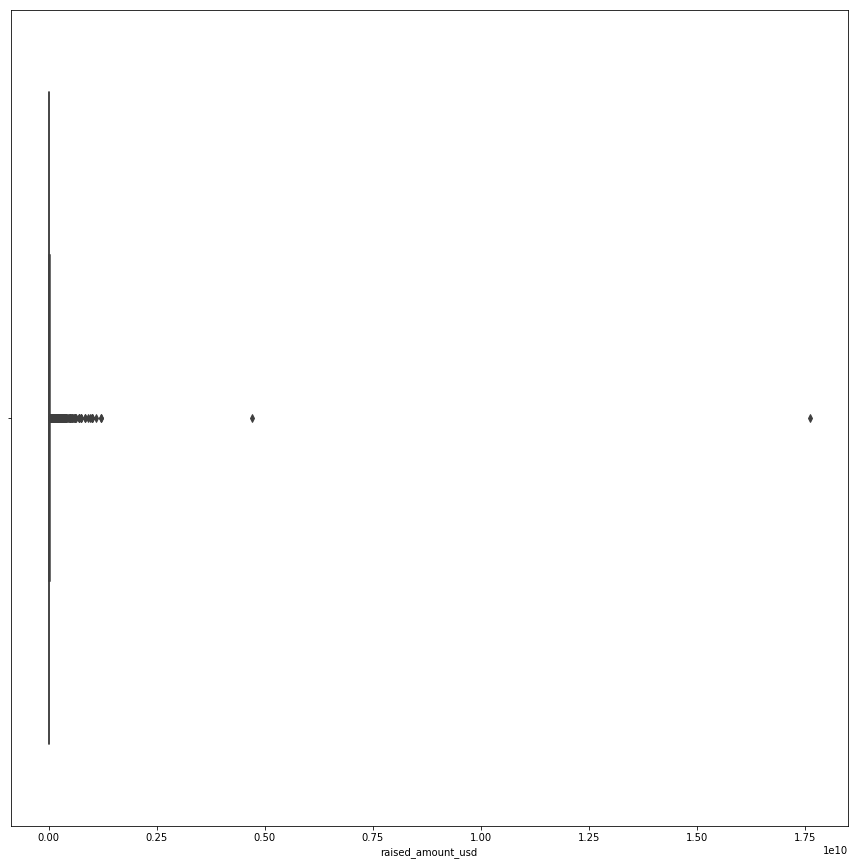

In [220]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 15))
sns.boxplot(venture_frame.raised_amount_usd)
plt.show()

seed funding round analysis

In [223]:
seed_frame=master_frame[master_frame.funding_round_type=='seed']

In [224]:
seed_frame.describe()

,raised_amount_usd
count,2.109500e+04
mean,7.477937e+05
std,2.288318e+06
min,0.000000e+00
25%,6.881650e+04
50%,3.000000e+05
75%,1.000000e+06
max,2.000000e+08


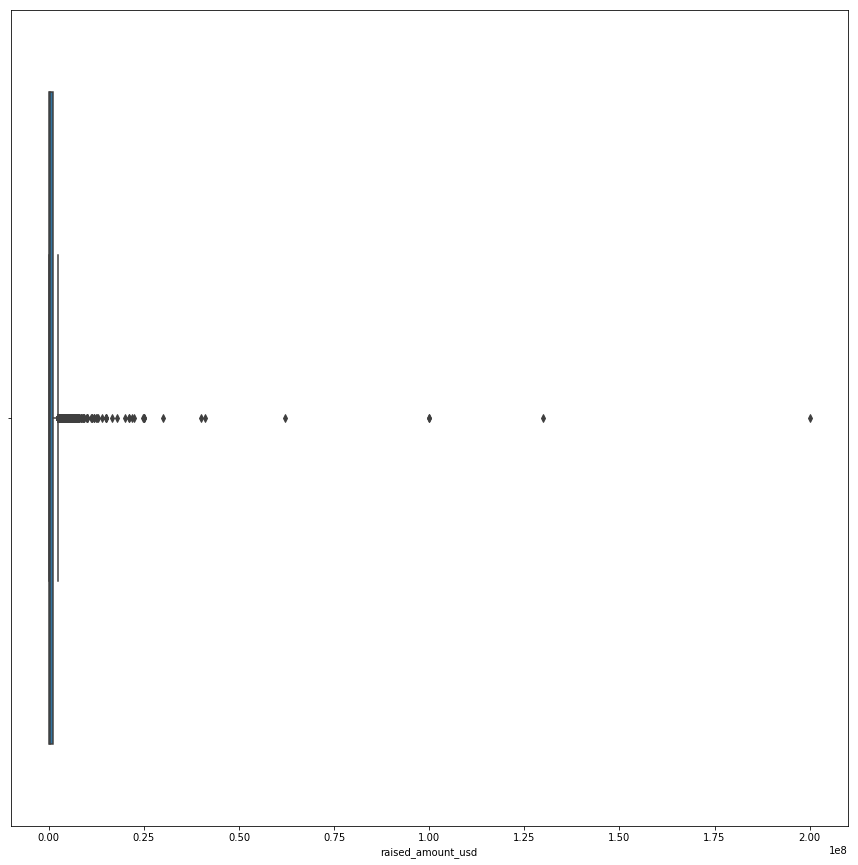

In [225]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 15))
sns.boxplot(seed_frame.raised_amount_usd)
plt.show()

filtering dataframe as per angel funding round type

In [226]:
angel_frame=master_frame[master_frame.funding_round_type=='angel']

In [227]:
angel_frame.shape

(4400, 15)

In [228]:
angel_frame.describe()

,raised_amount_usd
count,4.400000e+03
mean,9.715739e+05
std,7.710904e+06
min,0.000000e+00
25%,1.527565e+05
50%,4.149060e+05
75%,1.000000e+06
max,4.945120e+08


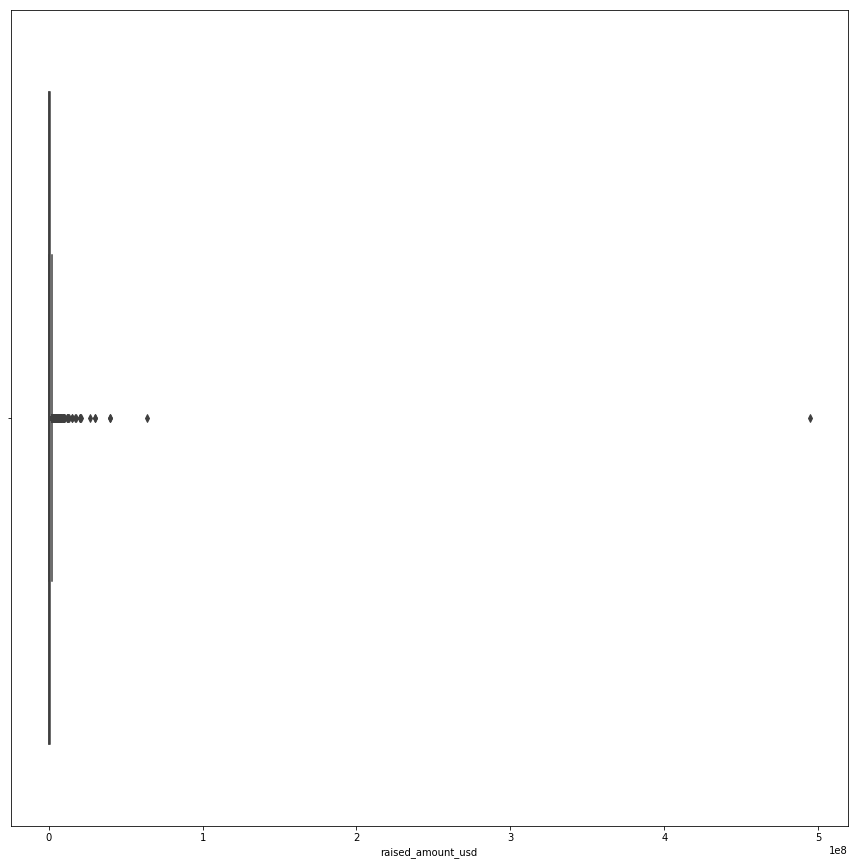

In [229]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 15))
sns.boxplot(angel_frame.raised_amount_usd)
plt.show()

filtering master dataframe as per private equity funding round type

In [230]:
private_eq_frame=master_frame[master_frame.funding_round_type=='private_equity']

In [231]:
private_eq_frame.shape

(1820, 15)

In [232]:
private_eq_frame.describe()

,raised_amount_usd
count,1.820000e+03
mean,7.393849e+07
std,2.017765e+08
min,0.000000e+00
25%,5.000000e+06
50%,2.000000e+07
75%,7.576257e+07
max,4.745460e+09


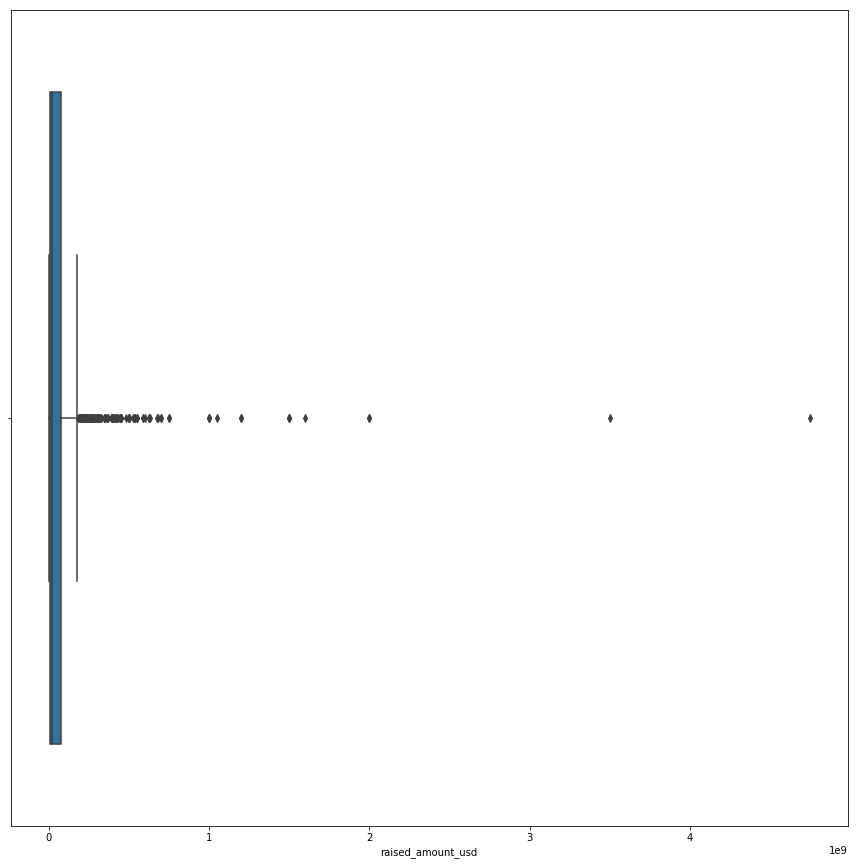

In [233]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 15))
sns.boxplot(private_eq_frame.raised_amount_usd)
plt.show()

# Plotting Funding Round Types median values

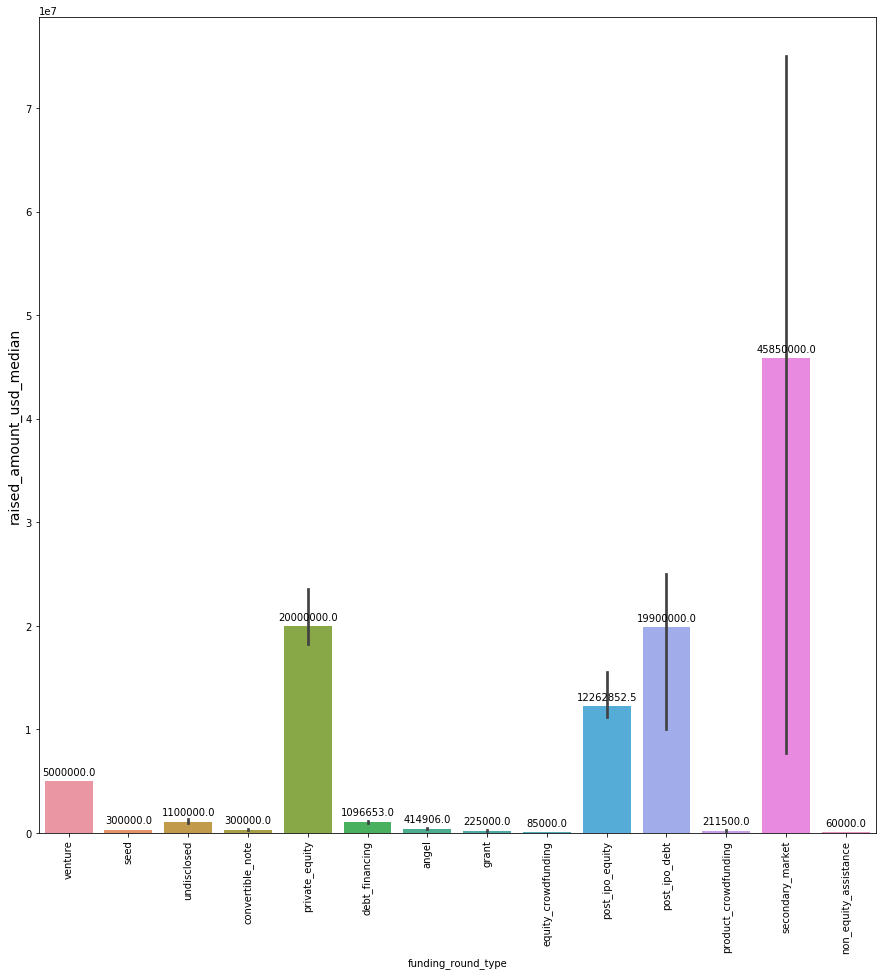

In [234]:

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 15))
splot=sns.barplot(data=master_frame,x='funding_round_type',y='raised_amount_usd',estimator=np.median)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.ylabel("raised_amount_usd_median", size=14)
plt.xticks(rotation="vertical")
plt.show()

In [236]:
#Grouping by country code and finding sum of raised_amount_usd
#We select USA,GBR & IND as official english speaking countries 
top9=venture_frame.groupby('country_code').sum().sort_values(by='raised_amount_usd',ascending=False).head(9)
top9=top9.reset_index()
top9

,country_code,raised_amount_usd
0,USA,4.200680e+11
1,CHN,3.933892e+10
2,GBR,2.007281e+10
3,IND,1.426151e+10
4,CAN,9.482218e+09
5,FRA,7.226851e+09
6,ISR,6.854350e+09
7,DEU,6.306922e+09
8,JPN,3.167647e+09


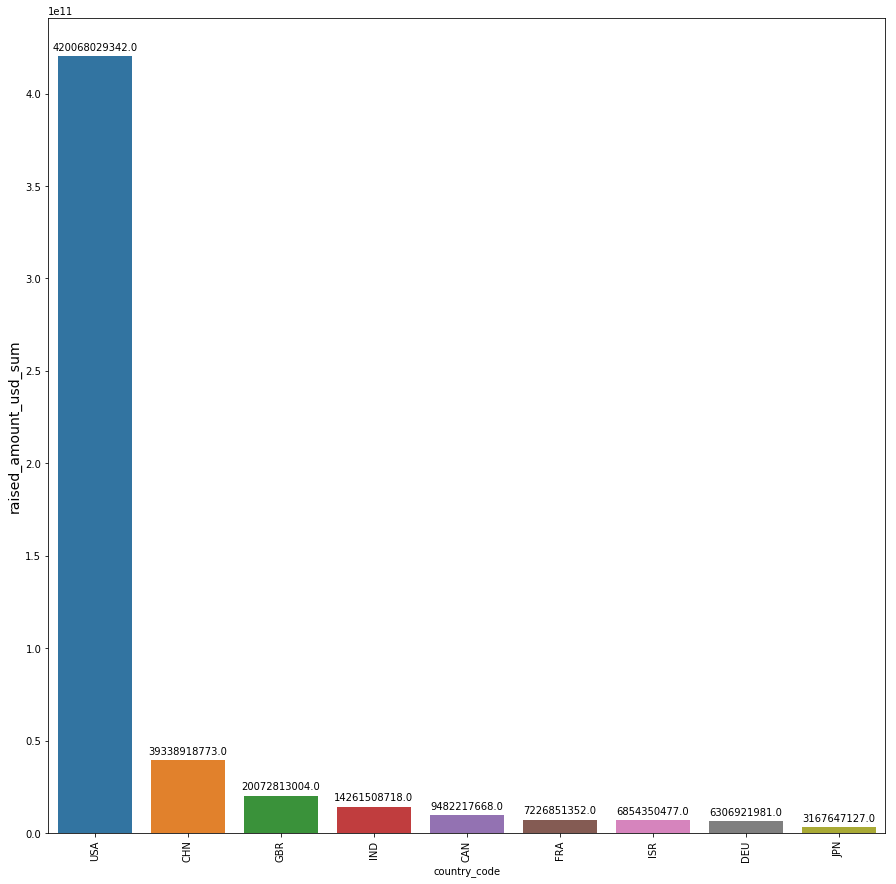

In [237]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 15))
splot=sns.barplot(data=top9,x='country_code',y='raised_amount_usd')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.ylabel("raised_amount_usd_sum", size=14)
plt.xticks(rotation="vertical")
plt.show()

# Mapping Main Sector to venture dataframe

In [241]:
#extracting primary sectors from the category list
venture_frame['primary sector']=venture_frame.category_list.apply(lambda x: x.split("|")[0])

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [242]:
#importing mappings csv
mappings=pd.read_csv("C:\\Users\\dell\\Downloads\\mapping.csv",encoding = "ISO-8859-1")

In [243]:
mappings.dropna(inplace=True)

In [244]:
#replacing 0 with na in mappings csv
mappings.category_list=mappings.category_list.apply(lambda x: x.replace("0","na"))

In [245]:
mappings.category_list=mappings.category_list.apply(lambda x: "Na"+x[2:] if x[:2]=='na' else x)

In [246]:
#extracting main sector from primary sector
def extract_main_sector(value):
    try:
        mappings_df=mappings[mappings.category_list==value]
        return ((mappings_df.iloc[0]==1).idxmax())
    except Exception as e:
        return "Not Available"
venture_frame['main sector']=venture_frame['primary sector'].apply(lambda x: extract_main_sector(x) )

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [248]:
#getting main_sector value counts
venture_frame['main sector'].value_counts()

Others                                     11409
Cleantech / Semiconductors                 10055
Social, Finance, Analytics, Advertising     9629
News, Search and Messaging                  5970
Health                                      3958
Manufacturing                               3281
Entertainment                               2752
Automotive & Sports                          735
Not Available                                 20
Name: main sector, dtype: int64

In [249]:
#filtering dataframes top english speaking countrywise
usa_df=venture_frame[(venture_frame.country_code=='USA')]
gbr_df=venture_frame[(venture_frame.country_code=='GBR')]
ind_df=venture_frame[(venture_frame.country_code=='IND')]

In [250]:
#limiting countrywise data between 5Million to 15Million
D1=usa_df[(usa_df.raised_amount_usd>=5000000) & (usa_df.raised_amount_usd<=15000000)]
D2=gbr_df[(gbr_df.raised_amount_usd>=5000000) & (gbr_df.raised_amount_usd<=15000000)]
D3=ind_df[(ind_df.raised_amount_usd>=5000000) & (ind_df.raised_amount_usd<=15000000)]

Top 3 english speaking countires dataframe shape after capping between 5M to 15M is

In [253]:
#knowing D1,D2,D3 dataframe size
print(D1.shape)
print(D2.shape)
print(D3.shape)

(12064, 17)
(621, 17)
(328, 17)


Sum o raised amount usd for selected 3 countries is

In [257]:
#getting raised amoud usd sum for the segregated countries dataframe
print(D1.raised_amount_usd.sum())
print(D2.raised_amount_usd.sum())
print(D3.raised_amount_usd.sum())


107766584223.0
5379078691.0
2949543602.0


In [283]:
combined_df=pd.concat([D1,D2,D3],axis=0)
pivot_df=pd.pivot_table(combined_df,index=['country_code','main sector'],values=['raised_amount_usd'],aggfunc='count')
pivot_df.reset_index(inplace=True)
pivot_df


,country_code,main sector,raised_amount_usd
0,GBR,Automotive & Sports,16
1,GBR,Cleantech / Semiconductors,130
2,GBR,Entertainment,56
3,GBR,Health,24
4,GBR,Manufacturing,42
5,GBR,"News, Search and Messaging",73
6,GBR,Others,147
7,GBR,"Social, Finance, Analytics, Advertising",133
8,IND,Automotive & Sports,13
9,IND,Cleantech / Semiconductors,20


In [286]:
df1=pivot_df[pivot_df.country_code=='USA'].sort_values('raised_amount_usd',ascending=False)[:3]
df2=pivot_df[pivot_df.country_code=='GBR'].sort_values('raised_amount_usd',ascending=False)[:3]
df3=pivot_df[pivot_df.country_code=='IND'].sort_values('raised_amount_usd',ascending=False)[:3]
com_df=pd.concat([df1,df2,df3],axis=0)
com_df

,country_code,main sector,raised_amount_usd
23,USA,Others,2950
24,USA,"Social, Finance, Analytics, Advertising",2714
17,USA,Cleantech / Semiconductors,2350
6,GBR,Others,147
7,GBR,"Social, Finance, Analytics, Advertising",133
1,GBR,Cleantech / Semiconductors,130
14,IND,Others,110
15,IND,"Social, Finance, Analytics, Advertising",60
13,IND,"News, Search and Messaging",52


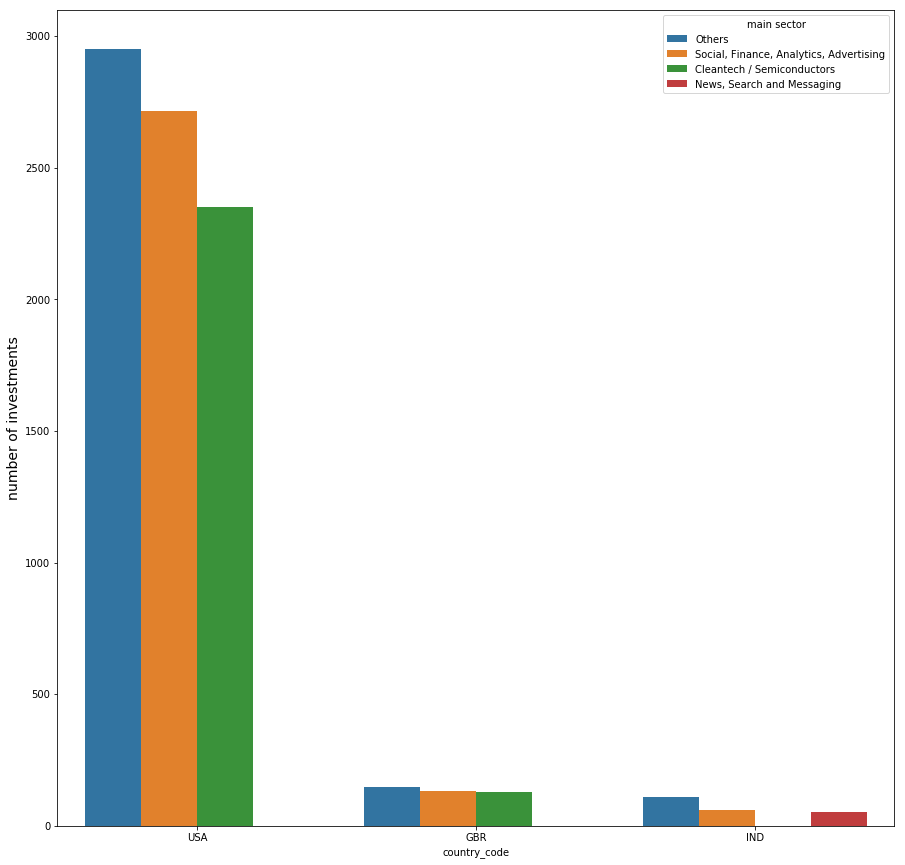

In [293]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 15))
splot=sns.barplot(x='country_code',y='raised_amount_usd',hue='main sector',data=com_df)
plt.ylabel("number of investments", size=14)
plt.show()

# USA Details

Top3 Main sectors for USA are :

In [258]:
#top3 sector for USA are :
D1["main sector"].value_counts()[:3]

Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2350
Name: main sector, dtype: int64

Top Company in Others main sector for USA is:

In [259]:

D1[D1["main sector"]=='Others'].groupby('name').sum().sort_values(by='raised_amount_usd',ascending=False).iloc[0]

raised_amount_usd    64300000.0
Name: Virtustream, dtype: float64

Top company in 'Social, Finance, Analytics, Advertising' sector for USA is:

In [260]:
D1[D1["main sector"]=='Social, Finance, Analytics, Advertising'].groupby('name').sum().sort_values(by='raised_amount_usd',ascending=False).iloc[0]

raised_amount_usd    67933006.0
Name: SST Inc. (Formerly ShotSpotter), dtype: float64

# GBR Details

Top3 sectors for Great Britain country are:

In [272]:
D2["main sector"].value_counts()[:3]

Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 130
Name: main sector, dtype: int64

Top company for GBR in Others sector is:

In [262]:
D2[D2["main sector"]=='Others'].groupby('name').sum().sort_values(by='raised_amount_usd',ascending=False).iloc[0]

raised_amount_usd    37000000.0
Name: Electric Cloud, dtype: float64

Top company in 'Social, Finance, Analytics, Advertising' for GBR is:

In [265]:
D2[D2["main sector"]=='Social, Finance, Analytics, Advertising'].groupby('name').sum().sort_values(by='raised_amount_usd',ascending=False).iloc[0]

raised_amount_usd    37500000.0
Name: Celltick Technologies, dtype: float64

# IND Details

Top 3 Sectors in India are:

In [273]:
D3["main sector"].value_counts()[:3]

Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Name: main sector, dtype: int64

Top company in Others sector in india is:

In [269]:
D3[D3["main sector"]=='Others'].groupby('name').sum().sort_values(by='raised_amount_usd',ascending=False).iloc[0]

raised_amount_usd    39000000.0
Name: FirstCry.com, dtype: float64

Top company in 'Social, Finance, Analytics, Advertising' sector in india is:

In [271]:
D3[D3["main sector"]=='Social, Finance, Analytics, Advertising'].groupby('name').sum().sort_values(by='raised_amount_usd',ascending=False).iloc[0]

raised_amount_usd    50700000.0
Name: Manthan Systems, dtype: float64